# IBM Capstone project week 4 - Finding the best spot for a new japanese restaurant

## *I - Data acquisition and cleaning*

### 1. Loading packages and libraries needed for this project

In [1]:
# loading soup

!pip install beautifulsoup4

In [2]:
# loagind packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests



In [3]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [5]:
#installing geocoder
!pip install geocoder

     |████████████████████████████████| 102kB 8.0MB/s ta 0:00:011


In [6]:
# import geocoder
import geocoder 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#### *Scrapping wiki page to retrieve neighborhoods in Natal/Brazil*

In [7]:
# scrapping wiki page to retrieve neighborhoods in Natal/Brazil
no_pages = 50

def get_data():  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    
    #r = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    r = requests.get('https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Natal_(Rio_Grande_do_Norte)')#, proxies=proxies)
    #r = requests.get('https://www.google.com/search?rlz=1C1SQJL_pt-BRBR796BR797&sxsrf=ALeKk02TLF1MbOPG8jscr7831WIv-KVWow:1593784550776&q=restaurantes+japoneses+em+natal&npsic=0&rflfq=1&rlha=0&rllag=-5842476,-35201117,3412&tbm=lcl&ved=2ahUKEwit8vyPnrHqAhVtHrkGHbkPBnMQjGp6BAgMEEI&rldoc=1#rlfi=hd:;si:;mv:[[-5.780544,-35.1744414],[-5.8879946,-35.2213549]];tbs:lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!2m1!1e2!2m1!1e3!3sIAE,lf:1,lf_ui:9')#, proxies=proxies)')#, proxies=proxies)
    
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')
    #print(soup)
    
    #for d in soup.findAll('table'):
    #    print(d)
    
    table = soup.find(name='table', attrs={'class':'wikitable'})
    #print(table)
    
    table_str = str(table)
    df = pd.read_html(table_str)[0]
    return df

In [8]:
#as we noticed, this webscrapping wont be necessary, since we have the same information from the csv file, 
#with additional socioeconomic data

table_df = get_data()
table_df.drop(columns=['Localização','Zona/Região'], inplace=True)

table_df = table_df+ ', Natal, RN, Brazil'
table_df.columns = ['Neighborhood']
table_df.head(10)


### implementar posteriormente por cep atraves desta pagina
### https://cep.guiamais.com.br/busca/natal-rn?page=8

,Neighborhood
0,"Alecrim, Natal, RN, Brazil"
1,"Areia Preta, Natal, RN, Brazil"
2,"Barro Vermelho, Natal, RN, Brazil"
3,"Bom Pastor, Natal, RN, Brazil"
4,"Candelária, Natal, RN, Brazil"
5,"Capim Macio, Natal, RN, Brazil"
6,"Cidade Alta, Natal, RN, Brazil"
7,"Cidade da Esperança, Natal, RN, Brazil"
8,"Cidade Nova, Natal, RN, Brazil"
9,"Dix-Sept Rosado, Natal, RN, Brazil"


### 2. Reads the csv file contains:

<ol>
    <li>First column is neighborhood's name;</li>
    <li>Second from fourth columns refers to per capita salary from citizens that live in this place, where the second column is the percentage of people that earns low salary;</li>
    <li>Third column is from people that earns a good salary;</li>
    <li>Fourth column is from people that have the better salary in neighborhood</li>
    <li>Fifth column is the percentage of education in the neighborhood</li>
</ol>

In [9]:
# The code was removed by Watson Studio for sharing.

,BAIRRO,RM até 3 Sal,RM até 10 Sal,RM acima 10 Sal,Alfabetizado
0,Alecrim,90.95,8.20,0.68,93.70
1,Areia Preta,62.36,23.87,13.78,96.99
2,Barro Vermelho,46.99,43.56,9.40,97.80
3,Bom Pastor,98.72,1.23,0.04,82.44
4,Candelária,50.75,39.89,9.33,97.61
5,Capim Macio,43.67,45.94,10.37,97.98
6,Cidade Alta,77.39,19.13,3.23,90.49
7,Cidade da Esperança,89.71,8.62,1.66,93.27
8,Cidade Nova,97.89,2.02,0.08,84.93
9,Dix-sept Rosado,95.67,4.19,0.15,88.33


#### Describing data retrieved from csv file, where we can see mean, standard deviation, quartiles and max values from all columns we read in the file

In [10]:
df_data_1.describe()

,RM até 3 Sal,RM até 10 Sal,RM acima 10 Sal,Alfabetizado
count,36.000000,36.00000,36.000000,36.000000
mean,80.881944,15.31750,3.784167,90.353889
std,21.039943,15.78388,5.818864,6.332244
min,30.120000,0.32000,0.000000,72.210000
25%,69.462500,2.53500,0.107500,86.750000
50%,92.010000,7.13500,0.845000,91.040000
75%,97.377500,24.66500,6.030000,95.447500
max,99.560000,48.24000,23.200000,98.000000


#### Using boxplot to discover distribution data from all columns!

We can observe that the first two columns are far more spread than the others columns, which can says that basic education dont differs too much from all neighborhood. It would be more interesting if we use more columns about education, like high school percentage, and graduated and pos graduated percentage of population.

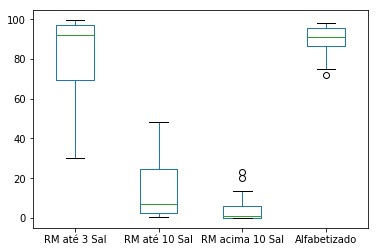

In [11]:
#df_data_1.iloc[:, 0:2].transpose().plot(kind='box')
df_data_1.iloc[:, 0:5].plot(kind='box')

#df_data_1.dtypes

### 3. Normalizing socio-economic data
Using Standard Scaler function, we normalize the data, a necessary step to use clustering algorithms!

In [12]:

#Normalizing economic data,

from sklearn.preprocessing import StandardScaler
X = df_data_1.iloc[:,1:5]

print(df_data_1.columns[1:5])

Norm_ds = StandardScaler().fit_transform(X)
Natal_ds = pd.DataFrame(Norm_ds,columns=df_data_1.columns[1:5])

table_df = df_data_1[['BAIRRO']].join(Natal_ds)
table_df.rename(columns={'BAIRRO': 'Neighborhood'}, inplace=True)


#df_org.rename(columns={'A': 'a'}, index={'ONE': 'one'}, inplace=True)

Index(['RM até 3 Sal', 'RM até 10 Sal', 'RM acima 10 Sal', 'Alfabetizado'], dtype='object')


In [13]:
table_df.head(10)

,Neighborhood,RM até 3 Sal,RM até 10 Sal,RM acima 10 Sal,Alfabetizado
0,Alecrim,0.485309,-0.457331,-0.541033,0.535920
1,Areia Preta,-0.892810,0.549536,1.742200,1.062853
2,Barro Vermelho,-1.633688,1.814707,0.978798,1.192584
3,Bom Pastor,0.859845,-0.905185,-0.652581,-1.267505
4,Candelária,-1.452445,1.578893,0.966598,1.162154
5,Capim Macio,-1.793722,1.967633,1.147862,1.221414
6,Cidade Alta,-0.168322,0.244970,-0.096587,0.021800
7,Cidade da Esperança,0.425537,-0.430344,-0.370227,0.467050
8,Cidade Nova,0.819837,-0.854424,-0.645609,-0.868701
9,Dix-sept Rosado,0.712826,-0.714992,-0.633409,-0.324150


### 4. Retrieving GPS position using Geocoder/Nominatim

In [14]:
# import geocoder
import geocoder 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

gps = pd.DataFrame(columns = ['lat','lon'])
for indices, row in table_df.iterrows():
    address = row['Neighborhood'] + ', Natal, RN, Brazil'
    #print(address)
    geolocator = Nominatim(user_agent="natal_explorer")
    
    location = None
    while (location == None):
       location = geolocator.geocode(address)
       #address = row['Borough']+', Toronto, Canada'
      
    latitude = location.latitude
    longitude = location.longitude
    
    new_row = {'lat':str(latitude), 'lon':str(longitude)}
    #append row to the dataframe
    gps = gps.append(new_row, ignore_index=True)
       
    print(str(indices)+ ' ' + row['Neighborhood']+ ' '+ str(latitude)+ ' '+str(longitude))


0 Alecrim -5.7988797 -35.2188577
1 Areia Preta -5.7869014 -35.1902633
2 Barro Vermelho -5.7978488 -35.2092207
3 Bom Pastor -5.8094982 -35.2462143
4 Candelária -5.8437235 -35.2214483
5 Capim Macio -5.8576398 -35.2014489
6 Cidade Alta -5.7856388 -35.20926
7 Cidade da Esperança -5.8250648 -35.235023
8 Cidade Nova -5.8372291 -35.2389607
9 Dix-sept Rosado -5.8089827 -35.2272512
10 Felipe Camarão -5.8257002 -35.2547225
11 Guarapes -5.8366106 -35.271913
12 Igapó -5.7690001 -35.2618893
13 Lagoa Azul -5.7233255 -35.2614748
14 Lagoa Nova -5.8226937 -35.2126403
15 Lagoa Seca -5.8073333 -35.2106714
16 Mãe Luiza -5.7950652 -35.1862162
17 Neopólis -5.8666079 -35.2088062
18 Nordeste -5.7930033 -35.2444009
19 Nossa Senhora Apresentação -5.7465241 -35.27878
20 Nossa Senhora de Nazaré -5.8174362 -35.2313961
21 Nova Descoberta -5.8269204 -35.1985475
22 Pajuçara -5.7372347 -35.2360433
23 Petropólis -5.7845495 -35.1984438
24 Pitimbu -5.8633093 -35.2324324
25 Planalto -5.8521764 -35.2568875
26 Ponta Negra -

In [15]:
#table_ntl_gps = table_df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
table_ntl = table_df.join(gps)


In [16]:
table_ntl

,Neighborhood,RM até 3 Sal,RM até 10 Sal,RM acima 10 Sal,Alfabetizado,lat,lon
0,Alecrim,0.485309,-0.457331,-0.541033,0.535920,-5.7988797,-35.2188577
1,Areia Preta,-0.892810,0.549536,1.742200,1.062853,-5.7869014,-35.1902633
2,Barro Vermelho,-1.633688,1.814707,0.978798,1.192584,-5.7978488,-35.2092207
3,Bom Pastor,0.859845,-0.905185,-0.652581,-1.267505,-5.8094982,-35.2462143
4,Candelária,-1.452445,1.578893,0.966598,1.162154,-5.8437235,-35.2214483
5,Capim Macio,-1.793722,1.967633,1.147862,1.221414,-5.8576398,-35.2014489
6,Cidade Alta,-0.168322,0.244970,-0.096587,0.021800,-5.7856388,-35.20926
7,Cidade da Esperança,0.425537,-0.430344,-0.370227,0.467050,-5.8250648,-35.235023
8,Cidade Nova,0.819837,-0.854424,-0.645609,-0.868701,-5.8372291,-35.2389607
9,Dix-sept Rosado,0.712826,-0.714992,-0.633409,-0.324150,-5.8089827,-35.2272512


### 5. Plotting gps center of all neighborhood in town

In [17]:
# create map of New York using latitude and longitude values
map_ntl = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(table_ntl['lat'], table_ntl['lon'], table_ntl['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ntl)  
    
map_ntl

#### *Note that Santos Reis Neighborhood had a problem when we retrieve gps position, indicating a neighborhood from other city!*
In this case, we will delete this neighborhood. The reason for that, is that this location is a peripherical militar area that is not a interest point to a japanese restaurant. If this location was important to solve this problem, we could try to retrieve a gps from google maps instead.

In [18]:
# Drop row from Santos Reis Neighborhood
table_ntl.drop([34],inplace=True)
table_ntl.reset_index(drop=True,inplace=True)
table_ntl

,Neighborhood,RM até 3 Sal,RM até 10 Sal,RM acima 10 Sal,Alfabetizado,lat,lon
0,Alecrim,0.485309,-0.457331,-0.541033,0.535920,-5.7988797,-35.2188577
1,Areia Preta,-0.892810,0.549536,1.742200,1.062853,-5.7869014,-35.1902633
2,Barro Vermelho,-1.633688,1.814707,0.978798,1.192584,-5.7978488,-35.2092207
3,Bom Pastor,0.859845,-0.905185,-0.652581,-1.267505,-5.8094982,-35.2462143
4,Candelária,-1.452445,1.578893,0.966598,1.162154,-5.8437235,-35.2214483
5,Capim Macio,-1.793722,1.967633,1.147862,1.221414,-5.8576398,-35.2014489
6,Cidade Alta,-0.168322,0.244970,-0.096587,0.021800,-5.7856388,-35.20926
7,Cidade da Esperança,0.425537,-0.430344,-0.370227,0.467050,-5.8250648,-35.235023
8,Cidade Nova,0.819837,-0.854424,-0.645609,-0.868701,-5.8372291,-35.2389607
9,Dix-sept Rosado,0.712826,-0.714992,-0.633409,-0.324150,-5.8089827,-35.2272512


### 6. Define Foursquare Credentials and Version (hidden cell)

In [19]:
# The code was removed by Watson Studio for sharing.

#### *Let's explore the first neighborhood in our dataframe.*

In [20]:
table_ntl.loc[0, 'Neighborhood']


'Alecrim'

In [21]:
neighborhood_latitude = table_ntl.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = table_ntl.loc[0, 'lon'] # neighborhood longitude value
neighborhood_name = table_ntl.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alecrim are -5.7988797, -35.2188577.


#### Now, let's get the top 200 venues that are in Alecrim within a radius of 1000 meters.

In [22]:
# The code was removed by Watson Studio for sharing.

'There are 5 around Venues.'

#list(results.items())[:2]

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Artkasa Design,Furniture / Home Store,-5.799280,-35.219787
1,Atacado da Pesca,Fishing Store,-5.798980,-35.216604
2,Cricricell Apple - Assistência Técnica Apple,Mobile Phone Shop,-5.797596,-35.216645
3,Docelândia,Candy Store,-5.796091,-35.216857
4,Padaria Santa Cecilia,Bakery,-5.797099,-35.220302


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [26]:
# The code was removed by Watson Studio for sharing.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *natal_venues*.

In [27]:
natal_venues = getNearbyVenues(names=table_ntl['Neighborhood'],
                                   latitudes=table_ntl['lat'],
                                   longitudes=table_ntl['lon']
                                  )



Alecrim
Areia Preta
Barro Vermelho
Bom Pastor
Candelária
Capim Macio
Cidade Alta
Cidade da Esperança
Cidade Nova
Dix-sept Rosado
Felipe Camarão
Guarapes
Igapó
Lagoa Azul
Lagoa Nova
Lagoa Seca
Mãe Luiza
Neopólis
Nordeste
Nossa Senhora Apresentação
Nossa Senhora de Nazaré
Nova Descoberta
Pajuçara
Petropólis
Pitimbu
Planalto
Ponta Negra
Potengi
Praia do Meio
Quintas
Redinha
Ribeira
Rocas
Salinas
Tirol


In [28]:
print(natal_venues.shape)
natal_venues.head()

(2108, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alecrim,-5.7988797,-35.2188577,Artkasa Design,-5.799280,-35.219787,Furniture / Home Store
1,Alecrim,-5.7988797,-35.2188577,Atacado da Pesca,-5.798980,-35.216604,Fishing Store
2,Alecrim,-5.7988797,-35.2188577,Cricricell Apple - Assistência Técnica Apple,-5.797596,-35.216645,Mobile Phone Shop
3,Alecrim,-5.7988797,-35.2188577,Docelândia,-5.796091,-35.216857,Candy Store
4,Alecrim,-5.7988797,-35.2188577,Padaria Santa Cecilia,-5.797099,-35.220302,Bakery


In [29]:
natal_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alecrim,100,100,100,100,100,100
Areia Preta,98,98,98,98,98,98
Barro Vermelho,100,100,100,100,100,100
Bom Pastor,12,12,12,12,12,12
Candelária,59,59,59,59,59,59
Capim Macio,100,100,100,100,100,100
Cidade Alta,100,100,100,100,100,100
Cidade Nova,20,20,20,20,20,20
Cidade da Esperança,85,85,85,85,85,85


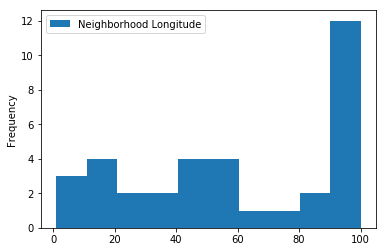

In [30]:
natal_venues.groupby('Neighborhood').count().iloc[:,1:2].plot.hist()#(kind='hist', figsize=(15,6))

#### Looking at histogram that shows neighborhood's venue quantities, we observe that around 1/3 of all neighborhoods returned 100 venues, indicating that this is the maximum limit that foursquare api is returning. In next versions we need to fix this limitation to get a better result from the city.

In fact, we change this LIMIT variable to 200 but this free public foursquare seems to limit to one hundred venues returned each call.

In [31]:
print('There are {} uniques categories.'.format(len(natal_venues['Venue Category'].unique())))

There are 211 uniques categories.


#### Printing the Venues Categories that exists in Natal

In [32]:
natal_venues['Venue Category'].unique()

array(['Furniture / Home Store', 'Fishing Store', 'Mobile Phone Shop',
       'Candy Store', 'Bakery', 'Clothing Store', 'Food Court', 'Bar',
       'Chinese Restaurant', 'Bookstore', 'Department Store',
       'Fast Food Restaurant', 'Dessert Shop', 'Acai House', 'Restaurant',
       'Pet Store', 'Snack Place', 'Herbs & Spices Store',
       'Electronics Store', 'Pool', 'Burger Joint', 'Sporting Goods Shop',
       'Market', 'Ice Cream Shop', 'Deli / Bodega', 'Gymnastics Gym',
       'Pharmacy', 'Camera Store', 'Brazilian Restaurant', 'Supermarket',
       'Café', 'Farmers Market', 'BBQ Joint', 'Gym', 'Tailor Shop',
       'Northeastern Brazilian Restaurant', 'Steakhouse', 'Churrascaria',
       'Pizza Place', 'Nature Preserve', 'Shopping Mall',
       'Gym / Fitness Center', 'Historic Site', 'Motorcycle Shop',
       'Juice Bar', 'Convenience Store', 'Arts & Crafts Store',
       'Shoe Store', 'Climbing Gym', 'Pedestrian Plaza', 'Tea Room',
       'Print Shop', 'Business Service', 'A

### 7. Analyze Each Neighborhood

In [33]:
# one hot encoding
natal_onehot = pd.get_dummies(natal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
natal_onehot['Neighborhood'] = natal_venues['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = list(natal_onehot.columns[natal_onehot.columns.str.contains('Neigh')])+\
                list(natal_onehot.columns[~natal_onehot.columns.str.contains('Neigh')])

natal_onehot = natal_onehot[fixed_columns]

natal_onehot.head(20)

#toronto_onehot['Neighborhood']


,Neighborhood,ATM,Acai House,Accessories Store,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Alecrim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [34]:
natal_grouped = natal_onehot.groupby('Neighborhood').mean().reset_index()
natal_grouped

,Neighborhood,ATM,Acai House,Accessories Store,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alecrim,0.000000,0.050000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00
1,Areia Preta,0.000000,0.000000,0.000000,0.010204,0.00,0.000000,0.000000,0.010204,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.010204,0.00000,0.000000,0.00
2,Barro Vermelho,0.000000,0.030000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.01,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.00000,0.000000,0.00
3,Bom Pastor,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.00000,0.000000,0.00
4,Candelária,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00
5,Capim Macio,0.000000,0.030000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.00000,0.000000,0.01
6,Cidade Alta,0.000000,0.010000,0.000000,0.000000,0.00,0.050000,0.010000,0.000000,0.01,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00
7,Cidade Nova,0.000000,0.050000,0.000000,0.000000,0.00,0.000000,0.000000,0.050000,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00
8,Cidade da Esperança,0.000000,0.023529,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.011765,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00
9,Dix-sept Rosado,0.012987,0.025974,0.012987,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00


In [35]:
natal_grouped.shape

(35, 212)

#### Let's print each neighborhood along with the top 10 most common venues

In [36]:
num_top_venues = 10

for hood in natal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = natal_grouped[natal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 3})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alecrim----
                    venue  freq
0                  Bakery  0.09
1             Snack Place  0.05
2              Acai House  0.05
3                     Bar  0.05
4  Furniture / Home Store  0.04
5             Supermarket  0.03
6                Pharmacy  0.03
7        Department Store  0.03
8            Dessert Shop  0.03
9    Brazilian Restaurant  0.03


----Areia Preta----
                  venue   freq
0            Restaurant  0.102
1                 Hotel  0.051
2                Bakery  0.051
3                 Plaza  0.041
4           Snack Place  0.031
5         Shopping Mall  0.031
6  Brazilian Restaurant  0.031
7  Gym / Fitness Center  0.031
8    Italian Restaurant  0.031
9      Sushi Restaurant  0.020


----Barro Vermelho----
                    venue  freq
0                  Bakery  0.07
1            Dessert Shop  0.05
2                Pharmacy  0.05
3              Acai House  0.03
4           Deli / Bodega  0.03
5            Burger Joint  0.03
6  Furniture / Home 

First, let's write a function to sort the venues in descending order.

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = natal_grouped['Neighborhood']

for ind in np.arange(natal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(natal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alecrim,Bakery,Acai House,Snack Place,Bar,Furniture / Home Store,Brazilian Restaurant,Restaurant,Dessert Shop,Department Store,Pharmacy
1,Areia Preta,Restaurant,Bakery,Hotel,Plaza,Shopping Mall,Gym / Fitness Center,Snack Place,Italian Restaurant,Brazilian Restaurant,Café
2,Barro Vermelho,Bakery,Dessert Shop,Pharmacy,Bar,Deli / Bodega,Clothing Store,Electronics Store,Chinese Restaurant,Burger Joint,Acai House
3,Bom Pastor,Bakery,Convenience Store,Gym / Fitness Center,Burger Joint,Plaza,Fast Food Restaurant,BBQ Joint,Gym,Restaurant,Warehouse Store
4,Candelária,Bar,Bakery,Restaurant,Pizza Place,Music Venue,Seafood Restaurant,Snack Place,Sushi Restaurant,Gym,Pharmacy


### Now we need to join natal_grouped dataset with table_ntl dataset to add the socioeconomic columns before proceed to cluster the neighborhoods

In [39]:
natal_grouped.shape
natal_grouped = natal_grouped.join(table_ntl.iloc[:,1:5])

In [40]:
print(natal_grouped.columns)

Index(['Neighborhood', 'ATM', 'Acai House', 'Accessories Store',
       'Antique Shop', 'Arcade', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Arts & Entertainment',
       ...
       'Waterfront', 'Whisky Bar', 'Wine Shop', 'Wings Joint', 'Women's Store',
       'Yoga Studio', 'RM até 3 Sal', 'RM até 10 Sal', 'RM acima 10 Sal',
       'Alfabetizado'],
      dtype='object', length=216)


### 8. Cluster Neighborhoods

<par><b> With the dataset ready to process, we call three times the kmeans algorithm, changing the number of centers, using 3, 5 and 7 centers to discover some information about the data. If we have supervised information, we could use elbow method to discover the optimal number of centroids

In [41]:
#defining clustering function
def myClusterFunction(nclusters,ds_grouped, ds_venues_sorted,ds_city):
    
    if 'Cluster Labels' in neighborhoods_venues_sorted.columns:
        print('Removing previous classification from dataset')
        neighborhoods_venues_sorted.drop(columns='Cluster Labels', inplace=True)
    
    # set number of clusters
    natal_grouped_clustering = ds_grouped.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(natal_grouped_clustering)

    # check cluster labels generated for each row in the dataframe
    kmeans.labels_[0:30]  

    # add clustering labels
    ds_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    natal_merged = ds_city

    # merge natal_grouped with natal_data to add latitude/longitude for each neighborhood
    natal_merged = natal_merged.join(ds_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
    natal_merged.head(20) # check the last columns!
    natal_merged.dropna(inplace=True)

    #print(kmeans.cluster_centers_[:,-4:])
    return natal_merged

In [42]:
# Defining a plot function
# We will use this function to plot any gps map from this notebook

def plotMap(latitud,longitud,kclusters,dataset,zoom_level=11):
    # create map
    map_clusters = folium.Map(location=[latitud, longitud], zoom_start=zoom_level)

    if kclusters:
        print('Clusters greater than 0')
        # set color scheme for the clusters
        x = np.arange(kclusters)
        ys = [i + x + (i*x)**2 for i in range(kclusters)]
        colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
        rainbow = [colors.rgb2hex(i) for i in colors_array]

        # add markers to the map
        markers_colors = []
        for lat, lon, poi, cluster in zip(dataset['lat'], dataset['lon'], dataset['Neighborhood'], dataset['Cluster Labels']):
            label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
            folium.CircleMarker(
                [float(lat), float(lon)],
                radius=5,
                popup=label,
                color=rainbow[int(cluster)-1],
                fill=True,
                fill_color=rainbow[int(cluster)-1],
                fill_opacity=0.7).add_to(map_clusters)
    else:
        print('Clusters equal 0')
        for lat, lon, poi in zip(dataset['Venue Latitude'], dataset['Venue Longitude'], dataset['Venue']):
            label = folium.Popup(str(poi), parse_html=True)
            folium.CircleMarker(
                [float(lat), float(lon)],
                radius=2,
                popup=label,
                color=colors.rgb2hex('#3388dd'),
                fill=True,
                fill_color=colors.rgb2hex('#ffddaa'),
                fill_opacity=0.7).add_to(map_clusters)
        
    print('Generating Map')     
    return map_clusters

#### We used three diferent quantities of centers in clustering to have more insights about the city
We used this method to verify if we have important changes when we differ the numbers of clusters.

In the first case, we use <b>3 centers for the clustering function</b>, and as we can see, the neighborhoods were well defined in terms of low, medium and high wellness, where the green center corresponds a poor locations, the red center corresponds a not so rich and not so poor neighborhoods, where the last color, purple, refers to a better and richer locations from natal.

In [43]:
kclusters = 3
k3 = myClusterFunction(kclusters,natal_grouped,neighborhoods_venues_sorted,table_ntl)
k3
p = plotMap(latitude, longitude, kclusters,k3)
p

Clusters greater than 0
Generating Map


In the second case, we use <b>5 centers for the clustering function</b>, and as we can see, the neighborhoods were defined like this:
<ol>
    <li>Red Center (center 0): Contains <b>the richest area from city</b>, Tirol and Petropólis are in red in this clustering;</li>
    <li>Blue Center (center 2):  <b>Upper Middle Class Neighborhoods</b>, contains Ribeira, Areia Preta, Barro Vermelho, Lagoa Nova, Candelária, Capim Macio</li>
    <li>Green Center (center 3): <b>Lower Middle Class Neighborhoods</b>, contains Ponta Negra, Lagoa Seca, Neópolis, Pitimbu, Cidade Alta, Nova Descoberta and Praia do Meio. These neighborhoods areas in this category are clearly divided where some part of them are very rich, and other part is very poor. In cluster Blue, these differences are not so big as we can see here;</li>
    <li>Purple Center(center 1): Peripherical with <b>low income and low number of venues in city</b>, contains almost all west and north locations except Rocas and Mae Luiza;</li>
    <li>Orange Center (center 4): Contains Guararapes and Salinas neighborhood, <b>the poorest locations in town</b>;</li>
    
</ol>
    

In [44]:
kclusters = 5
k5 = myClusterFunction(kclusters,natal_grouped,neighborhoods_venues_sorted,table_ntl)
k5
p = plotMap(latitude, longitude, kclusters,k5)
p

Removing previous classification from dataset
Clusters greater than 0
Generating Map


In the third case, we use <b>7 centers for the clustering function</b>, and as we can see, the neighborhoods were defined like this:
<ol>
    <li>Dark Blue Center (center 2): Contains <b>the richest area from city</b>, Tirol and Petropólis are in red in this clustering;</li>
    <li>White Cream Center (center 5):  <b>Upper Middle Class Neighborhoods</b>, contains Barro Vermelho, Lagoa Nova, Candelária and Capim Macio;</li> 
    <li>Light Blue Center (center 3): <b>Lower Middle Class Neighborhoods</b>, contains Pitimbu, Neopólis, Ponta Negra, Nova Descoberta, Lagoa Seca, Cidade Alta and Praia do Meio;</li>
    <li>Purple Center(center 1): Contains Ribeira and Areia Preta neighborhood;</li>    
    <li>Red Center (center 0): Contains Potengi, Cidade Nova, Nossa Senhora da Nazaré, Alecrim and Rocas neighborhood, <b>comercial low class areas;</b></li>    
    <li>Orange Center (center 6): Contains Lagoa Azul, Pajuçara, Nossa Senhora da Apresentação, Igapó, Redinha, Mãe Luiza, Planalto, Felipe Camarão, Bom Pastor, Nordeste, Quintas, Dix-Sept Rosado and Cidade da Esperança neighborhood, <b>locations very poor in our city;</b></li>
    <li>Green Center (center 4): Contains Guararapes and Salinas neighborhood, <b>the poorest locations in town;</b></li>
    
</ol>
    

In [45]:
kclusters = 7
k7 = myClusterFunction(kclusters,natal_grouped,neighborhoods_venues_sorted,table_ntl)
k7
p = plotMap(latitude, longitude, kclusters,k7)
p

Removing previous classification from dataset
Clusters greater than 0
Generating Map


#natal_merged.loc[natal_merged['Cluster Labels'] == 0, natal_merged.columns[[1] + list(range(5, natal_merged.shape[1]))]]

#natal_merged.loc[natal_merged['Cluster Labels'] == 4]

### 9. Visualizing Data

#### After analyzing the data, we found out that are two categories that are the same for our problem. So, we considered the Japanese Restaurant and Sushi Restaurant category as 'Japanese Restaurant Category'
<p>Doing this, now we have 19 restaurants from Japanese Category, instead of only five, that we found out before joining categories.
<p>We used regular expressions to filter what we want in dataframe.

In [ ]:
Jap = natal_venues[natal_venues['Venue Category'].str.contains('Japanese|Sushi',regex=True)]
Jap

In [ ]:
Restaurants = natal_venues[natal_venues['Venue Category'].str.contains('Restaurant',regex=True)]
Restaurants.head(10)

Restaurants.groupby(['Neighborhood','Venue Category']).count().iloc[:,1:2]

#### As we can see in the previous maps, the economic spinal center in Natal have a format of the letter L, where we have Areia Preta Neighborhood as the first area going to straight line to Candelaria and then, finally, ends in Ponta Negra. 
Not surprising, only in these areas we can find japanese restaurants (Areia Preta -> Petropolis -> Tirol -> Lagoa Seca -> Lagoa Nova -> Candelária -> Capim Macio -> Ponta Negra), confirming that the target market we talked before. (high income with high education, mostly women, loves to eat japanese food in Brazil)

In [ ]:
#creating map with all japanese restaurants in natal
z = plotMap(latitude, longitude, 0, Jap)
z

#### Generating a map with all restaurants in Natal City.
Observe in map that when we see all kinds of restaurants, location's venue are far more spread than the japanese ones, indicating that we have in this case, many target public involved.

In [ ]:
#creating map with all restaurants in natal
z = plotMap(latitude, longitude, 0, Restaurants)
z

In [ ]:
#creating map with all venues in natal
z = plotMap(latitude, longitude, 0, natal_venues)
z

Resuming our study for this kind of problem, we have:
<ol>
    <li>In Brazil, there is a specific kind of public that usually eats Japanese food;</li>
    <li>We have found data about income and education per capita, in each neighborhood, by collecting information from Town City Hall;</li>
    <li>The foursquare APIs was used in order to get local piece of information and make a neighborhood profile. Therefore, we have obtained the best location area for a new Japanese restaurant;</li>
    <li>It was realized that the main area that has Japanese restaurants is located in 'economic central spine in town', a L-shape area situated between Areia Preta and Ponta Negra districts, including Candelaria.</li>
    <li>Many clustering attempts was successfully used to group neighborhoods and find the best spot to install a restaurant. We have tried clustering with three, five and seven centers, and we noticed the following standart:</li>
    <ul>
        <li>Petropolis and Tirol were always in the same center cluster and it means that we could choose any of them to install the restaurant;</li>
        <li>Neighborhoods located in the West and North Zones are not recommendend to install a Japonese restaurant, since they basically have the same profile: low income, low education and few venues in this area;</li>
    </ul>
    
</ol>    

## 10.Conclusion
Finally, checking the distribution of Japanese restaurants in the city and having discovered the path of the richest economic neighborhoods in the city, in an area that comprises the existing neighborhoods between Petrópolis - Candelária - Ponta Negra, we recommend installing a new Japanese restaurant between the neighborhoods of Ponta Negra and Capim Macio, as there is a large region between these neighborhoods with no restaurant in this culinary style.